# Fake news detection

### import library

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np


In [42]:
df = pd.read_csv("news.csv.csv")
    

In [43]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [44]:
df.shape

(6335, 4)

In [45]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [46]:
labels = df.label

In [47]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df["text"],labels,test_size=0.2,random_state=20)

In [49]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [50]:
# initilise a Tfidfvectorizer
vector = TfidfVectorizer(stop_words='english',max_df=0.7)

In [51]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [52]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [53]:
# pridiction the test dataset
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred= pac.predict(tf_test)

In [54]:
score = accuracy_score(y_test, y_pred)

In [55]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.95%


In [56]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[622,  26],
       [ 38, 581]], dtype=int64)

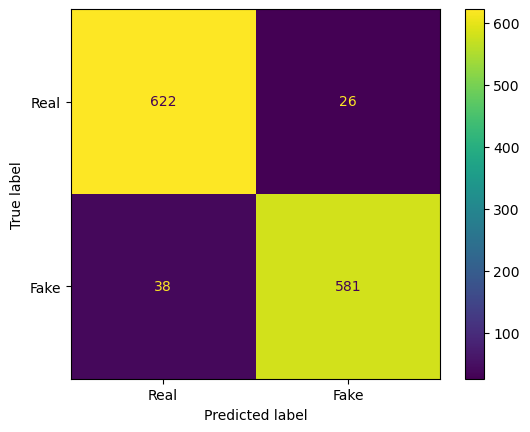

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()


In [71]:
# save model
import joblib
filename = 'model.joblib'
joblib.dump(pac, open(filename, 'wb'))

In [70]:
# save vectorizer
filename = 'vectorizer.joblib'
joblib.dump(vector, open(filename, 'wb'))